# Jatim Park 1 Sentiment Analysis

## Tujuan
Membandingkan hasil *sentiment labeling* dari **model IndoBERT (Hugging Face)** dengan data yang telah dilabeli secara manual (*ground truth*).

## Workflow
1. **Pengambilan Data**
   - Mengambil data ulasan Google Maps dari lokasi **Jatim Park 1**.

2. **Seleksi & Pembersihan Data**
   - Melakukan *filtering* terhadap ulasan untuk memastikan hanya data yang relevan digunakan dalam analisis.

3. **Penyamaan Urutan Data**
   - Melakukan *sorting* pada kedua DataFrame agar urutan data sejajar sebelum perhitungan akurasi.

4. **Pemanggilan Model**
   - Mengimpor *pretrained model* **IndoBERT Sentiment** dari *Hugging Face Transformers*.

5. **Inferensi Model**
   - Menerapkan model pada dataset untuk menghasilkan label sentimen dari model.

6. **Evaluasi Akurasi**
   - Membandingkan hasil prediksi model dengan label manual menggunakan metrik seperti:
     - Accuracy
     - Precision
     - Recall
     - F1-score

7. **Visualisasi Hasil**
   - Menampilkan hasil analisis melalui berbagai visualisasi:
     - Confusion Matrix
     - Boxplot *Rating vs Sentiment*
     - Perbandingan Label Manual dan Model

## Hasil Singkat
Model IndoBERT menunjukkan performa baik pada kelas *positive*, namun kurang optimal dalam mengenali *neutral* dan *negative*.
Akurasi keseluruhan: **67.8%**

## Insight
Ketidakseimbangan data dan inkonsistensi label manual berpengaruh signifikan terhadap hasil evaluasi.
Langkah lanjutan yang dapat dilakukan:
- Melakukan *relabeling* sebagian data agar lebih konsisten.


In [20]:
import pandas as pd
import re

In [21]:
df_label = pd.read_csv('https://drive.google.com/uc?id=1X-Pe9aVjb5yCeUnnI4-SjVleOCTD3-Um')
df_nonlabel = pd.read_csv('https://drive.google.com/uc?id=11g9_f47N8Uls6p6u666zz1Tkbv18Zafz')

In [22]:
df_label.sort_values(by=['user'], inplace=True)
df_label.head()

,user,review,rating,sentiment
280,08 .APRILITA NADIA PINGKAN,"Bisa untuk belajar sejarah ² ,penemuan",5,Positive
262,A- Rp.,Salah satu tempat wisata yang wajib di kunjung...,5,Positive
349,ACH JUNAIDI,"Berkunjunglah pada hari kerja, serasa milik se...",5,Positive
471,AVINASHOP,Tempat yang cocok utk edukasi anak2. Banyak wa...,5,Positive
479,AZIZ,Tempatnya bagus luas. Tapi aku cari kolam rena...,4,Positive


In [23]:
df_nonlabel.sort_values(by=['user'], inplace=True)
df_nonlabel.head()

,user,review,rating
280,08 .APRILITA NADIA PINGKAN,"Bisa untuk belajar sejarah ² ,penemuan",5
262,A- Rp.,Salah satu tempat wisata yang wajib di kunjung...,5
349,ACH JUNAIDI,"Berkunjunglah pada hari kerja, serasa milik se...",5
471,AVINASHOP,Tempat yang cocok utk edukasi anak2. Banyak wa...,5
479,AZIZ,Tempatnya bagus luas. Tapi aku cari kolam rena...,4


In [24]:
print('Labeled Data Info: ')
print(df_label.info())
print('\n==================================\n')
print('Non Labeled Data Info: ')
print(df_nonlabel.info())

Labeled Data Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 280 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       500 non-null    object
 1   review     500 non-null    object
 2   rating     500 non-null    int64 
 3   sentiment  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 19.5+ KB
None


Non Labeled Data Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 280 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    500 non-null    object
 1   review  500 non-null    object
 2   rating  500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 15.6+ KB
None


In [25]:
def preprocess(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # huruf berlebihan
    text = text.strip().lower()
    return text

df_nonlabel['review'] = df_nonlabel['review'].apply(preprocess)

In [27]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "indobenchmark/indobert-base-p1"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'negative', 'LABEL_2': 'neutral'}

def analyze_sentiment(text):
    result = sentiment_analysis(text)[0]
    label = label_index[result['label']]
    score = result['score']
    return pd.Series([label, score])

# Terapkan ke df
df_nonlabel[['sentiment', 'confidence']] = df_nonlabel['review'].apply(analyze_sentiment)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


KeyError: 'LABEL_4'

In [13]:
df_nonlabel

,user,review,rating,sentiment,confidence
280,08 .APRILITA NADIA PINGKAN,"bisa untuk belajar sejarah ² ,penemuan",5,negative,0.940359
262,A- Rp.,salah satu tempat wisata yang wajib di kunjung...,5,positive,0.994799
349,ACH JUNAIDI,"berkunjunglah pada hari kerja, serasa milik se...",5,positive,0.988226
471,AVINASHOP,tempat yang cocok utk edukasi anak2. banyak wa...,5,positive,0.997196
479,AZIZ,tempatnya bagus luas. tapi aku cari kolam rena...,4,positive,0.951484
...,...,...,...,...,...
17,xiaolust,safety pada wahana gatotkaca coaster masih kur...,4,positive,0.801858
182,yovanka adam,"taman bermain impian sejak kecil, meskipun uda...",5,positive,0.996360
54,yulia yusuf,"jatim park 1 semakin berbenah, di beberapa sta...",4,positive,0.996048
258,yusti yusti,"bagus untuk liburan dan hiburan, terutama bago...",4,positive,0.996775


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_label['sentiment'] = df_label['sentiment'].str.lower()
df_nonlabel['sentiment'] = df_nonlabel['sentiment'].str.lower()

accuracy = accuracy_score(df_label['sentiment'], df_nonlabel['sentiment'])
report = classification_report(df_label['sentiment'], df_nonlabel['sentiment'])
conf_mat = confusion_matrix(df_label['sentiment'], df_nonlabel['sentiment'])

In [15]:
print('Accuracy: ', accuracy, '\n')

print(report)

Accuracy:  0.678 

              precision    recall  f1-score   support

    negative       0.21      0.10      0.13        63
     neutral       0.23      0.18      0.20        96
    positive       0.79      0.93      0.86       341

    accuracy                           0.68       500
   macro avg       0.41      0.40      0.40       500
weighted avg       0.61      0.68      0.64       500



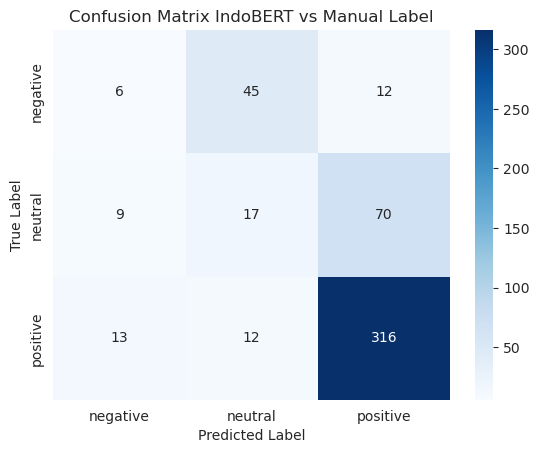

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(df_label['sentiment'], df_nonlabel['sentiment'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix IndoBERT vs Manual Label')
plt.show()

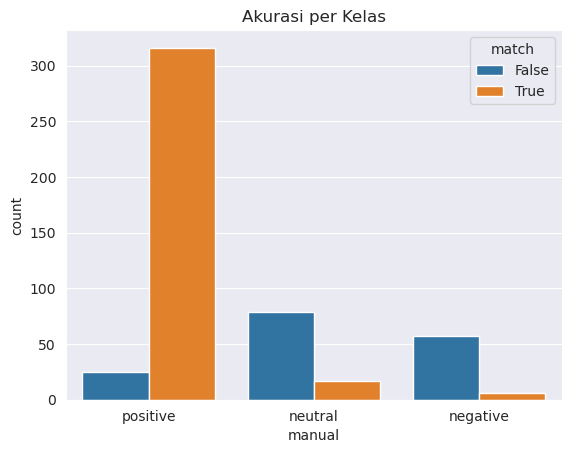

In [17]:
compare = pd.DataFrame({
    'manual': df_label['sentiment'],
    'predicted': df_nonlabel['sentiment']
})
compare['match'] = compare['manual'] == compare['predicted']

sns.countplot(x='manual', hue='match', data=compare)
plt.title('Akurasi per Kelas')
plt.show()

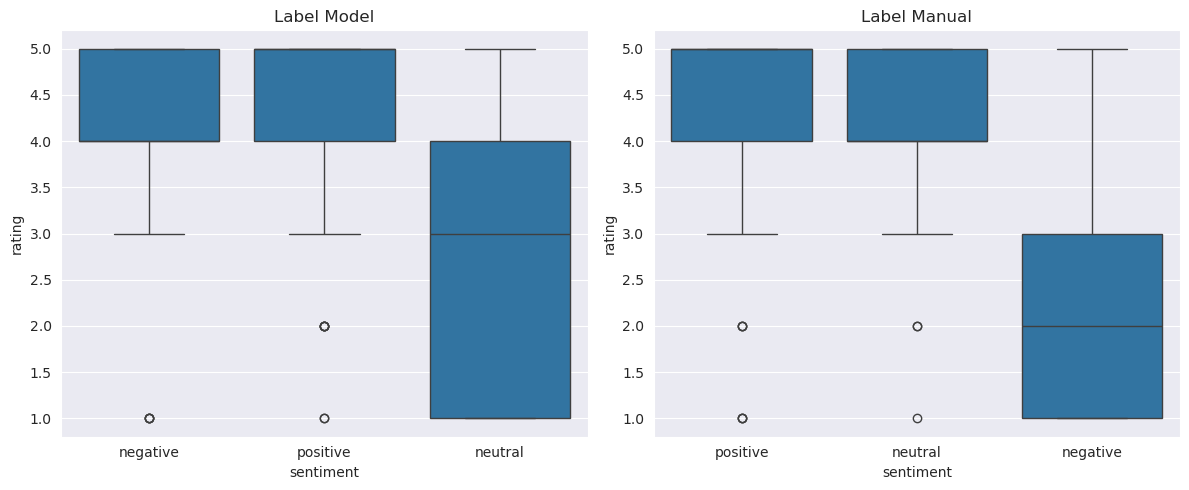

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df_nonlabel['sentiment'], y=df_nonlabel['rating'], ax=axes[0])
axes[0].set_title('Label Model')

sns.boxplot(x=df_label['sentiment'], y=df_label['rating'], ax=axes[1])
axes[1].set_title('Label Manual')

plt.tight_layout()
plt.show()
